In [267]:
import pandas as pd
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.cross_validation import train_test_split
from sklearn import metrics

%matplotlib inline

In [268]:
#4.1
#Generate (fake) data that is linearly related to log(x).
#You are making this model up. It is of the form B0 + B1*log(x) + epsilon. (You are making up the parameters.)
#Simulate some data from this model.
#Then fit two models to it:
#quadratic (second degree polynomial)
#logarithmic (log(x))
#(The second one should fit really well, since it has the same form as the underlying model!)

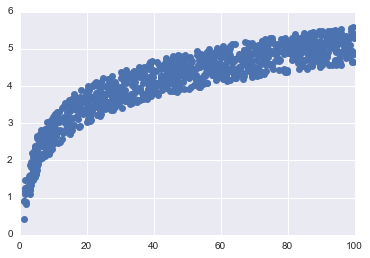

In [281]:
x = np.random.uniform(1, 100, 1000)
beta0 = 0
beta1 = 1
y = [beta0 + beta1 * math.log(n) + random.random() for n in x]
df = pd.DataFrame({'y':y, 'x':x})
plt.plot(df.x, df.y, 'o');

In [282]:
df['x^2'] = np.square(df['x'])
df['logx'] = np.log(df['x'])

In [283]:
X = df[['x', 'x^2']]
model = smf.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                 1.599e+04
Date:                Thu, 27 Oct 2016   Prob (F-statistic):               0.00
Time:                        13:08:49   Log-Likelihood:                -1114.0
No. Observations:                1000   AIC:                             2232.
Df Residuals:                     998   BIC:                             2242.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x              0.1499      0.002     93.083      0.000         0.147     0.153
x^2           -0.0011   2.07e-05    -52.073      0.000        -0.001    -0.001
==============================================================================
Omnibus:                       85.682   Durbin-Watson:                   1.738
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.970
Skew:                           0.415   Prob(JB):                     8.55e-12
Kurtosis:                       2.269   Cond. No.                         313.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

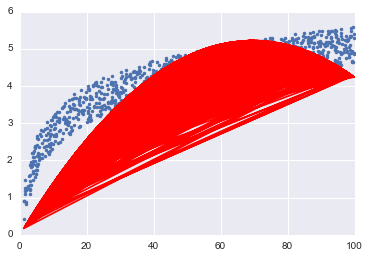

In [284]:
y_predict = fit.predict(X) 
plt.plot(df.x, df.y, '.', df.x, y_predict, 'r-');

In [285]:
X = df[['x', 'logx']]
model = smf.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 9.974e+04
Date:                Thu, 27 Oct 2016   Prob (F-statistic):               0.00
Time:                        13:08:55   Log-Likelihood:                -211.65
No. Observations:                1000   AIC:                             427.3
Df Residuals:                     998   BIC:                             437.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x             -0.0045      0.001     -8.641      0.000        -0.006    -0.004
logx           1.1948      0.008    146.795      0.000         1.179     1.211
==============================================================================
Omnibus:                      161.205   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.283
Skew:                           0.031   Prob(JB):                     8.02e-09
Kurtosis:                       2.056   Cond. No.                         50.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

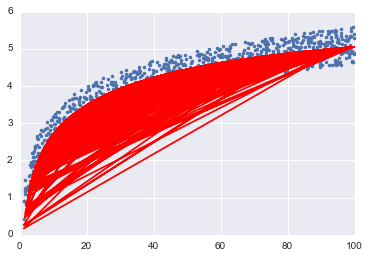

In [286]:
y_predict = fit.predict(X) 
plt.plot(df.x, df.y, '.', df.x, y_predict, 'r');

In [287]:
# 4.2
# Generate (fake) data from a model of the form B0 + B1*x + B2*x^2 + epsilon. 
#(You are making up the parameters.)
# Split the data into a training and test set.
# Fit a model to your training set. Calculate mean squared error on your training set. 
#Then calculate it on your test set.
# (You could use sklearn.metrics.mean_squared_error.)

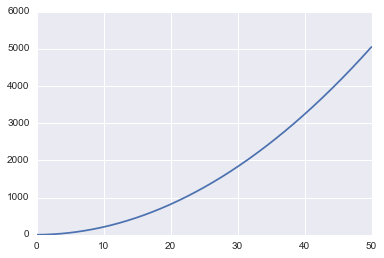

In [288]:
from sklearn.metrics import mean_squared_error

x = np.linspace(0, 50, num=1000)
beta0 = 0
beta1 = 1
beta2 = 2
y = beta0 + beta1 * x + beta2 * (x**2) + random.random()
df = pd.DataFrame({'y':y, 'x':x, 'x^2':x**2})
plt.plot(df['x'], df.y);

In [289]:
#train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['x', 'x^2']], df['y'], test_size = 0.3)

model = smf.OLS(y_train, X_train)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.970e+10
Date:                Thu, 27 Oct 2016   Prob (F-statistic):               0.00
Time:                        13:09:05   Log-Likelihood:                -146.57
No. Observations:                 700   AIC:                             297.1
Df Residuals:                     698   BIC:                             306.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x              1.0702      0.002    683.999      0.000         1.067     1.073
x^2            1.9988   4.06e-05   4.92e+04      0.000         1.999     1.999
==============================================================================
Omnibus:                      100.360   Durbin-Watson:                   1.709
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.028
Skew:                           1.106   Prob(JB):                     5.31e-32
Kurtosis:                       3.215   Cond. No.                         153.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [290]:
y_train_predict = fit.predict(X_train) 
mean_squared_error(y_train, y_train_predict)

0.089000552290072033

In [291]:
y_test_predict = fit.predict(X_test) 
mean_squared_error(y_test, y_test_predict)

0.082381200123101378

In [292]:
# 4.3

#For the data from two (above), try polynomial fits from 0th (just constant) 
#to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

#training error
#test error
#R squared

In [293]:
df['constant'] = df.x*0
df.head()

for i in range(3, 8):
    df['x^%d' % i] = df.x**i
    
df_poly = df.drop('y', axis=1)
df_poly.head()

,x,x^2,constant,x^3,x^4,x^5,x^6,x^7
0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
1,0.05005,0.002505,0.0,0.000125,0.000006,3.140672e-07,1.571908e-08,7.867407e-10
2,0.10010,0.010020,0.0,0.001003,0.000100,1.005015e-05,1.006021e-06,1.007028e-07
3,0.15015,0.022545,0.0,0.003385,0.000508,7.631833e-05,1.145921e-05,1.720602e-06
4,0.20020,0.040080,0.0,0.008024,0.001606,3.216048e-04,6.438535e-05,1.288996e-05


In [301]:
features = ['constant', 'x', 'x^2', 'x^3', 'x^4', 'x^5',  'x^6',  'x^7']

In [302]:
train_error =  []
test_error = []
r2 = []

for i in features:
    X_train, X_test, y_train, y_test = train_test_split(df[i], df.y, test_size = 0.3)
    
    model = sm.OLS(y_train, X_train)
    fit = model.fit()
    y_train_predict = fit.predict(X_train) 
    y_test_predict = fit.predict(X_test) 
    train_error.append(mean_squared_error(y_train, y_train_predict))
    test_error.append(mean_squared_error(y_test, y_test_predict))
    r2.append(fit.rsquared_adj)
    

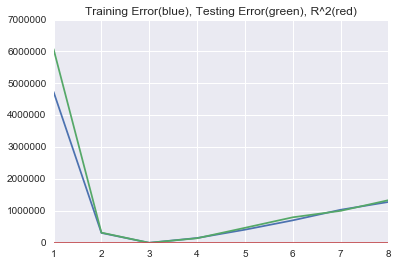

In [303]:
plt.plot(range(1,9), train_error)
plt.title("Training Error(blue), Testing Error(green), R^2(red)")

plt.plot(range(1,9), test_error)

plt.plot(range(1,9), r2)

In [304]:
#4.4
#For the data from two (above), fit a model to only the first 5 of your data points (m=5). 
#Then to first 10 (m=10). Then to first 15 (m=15). 
#In this manner, keep fitting until you fit your entire training set. 
#For each step, calculate the training error and the test error. 
#Plot both (in the same plot) over m. This is called a learning curve.

In [305]:
df.head()

,x,x^2,y,constant,x^3,x^4,x^5,x^6,x^7
0,0.00000,0.000000,0.883079,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
1,0.05005,0.002505,0.938139,0.0,0.000125,0.000006,3.140672e-07,1.571908e-08,7.867407e-10
2,0.10010,0.010020,1.003219,0.0,0.001003,0.000100,1.005015e-05,1.006021e-06,1.007028e-07
3,0.15015,0.022545,1.078319,0.0,0.003385,0.000508,7.631833e-05,1.145921e-05,1.720602e-06
4,0.20020,0.040080,1.163439,0.0,0.008024,0.001606,3.216048e-04,6.438535e-05,1.288996e-05


In [324]:
X = df[['constant', 'x', 'x^2', 'x^3', 'x^4', 'x^5', 'x^6', 'x^7']]
y = df.y
train_error = []
test_error = []

for i in range(5,105,5):
    X_train, X_test, y_train, y_test = train_test_split(X[:i], df.y[:i], test_size = 0.3)
    model = sm.OLS(y_train, X_train)
    fit = model.fit()
    y_train_predict = fit.predict(X_train) 
    y_test_predict = fit.predict(X_test) 
    train_error.append(mean_squared_error(y_train, y_train_predict))
    test_error.append(mean_squared_error(y_test, y_test_predict))

(0, 1)

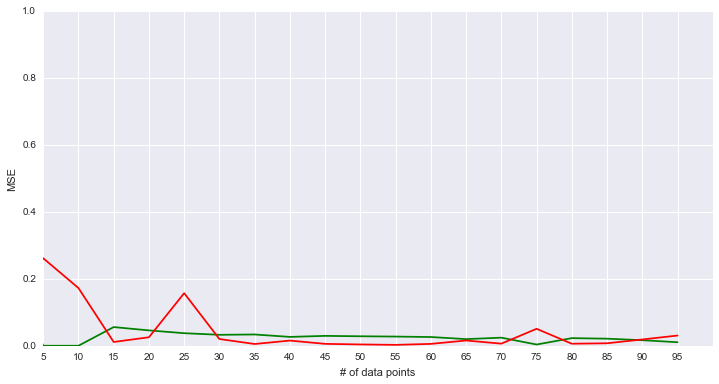

In [325]:
plt.figure(figsize=(12,6))
plt.plot(range(20), train_error, 'g')
plt.plot(range(20), test_error, 'r')
plt.xlabel('# of data points')
plt.xticks(range(20), range(0,100,5))
plt.ylabel('MSE')
plt.xlim(1,20)
plt.ylim(0,1)